<a href="https://colab.research.google.com/github/hiydavid/time_series_forecasting/blob/main/time_series_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Generation

In this notebook I will demonstrate functions that generate artificial time series.

In [1]:
# load basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

## Generate Time Series

In [2]:
# function to generate multiple univariate time series with sine waves

'''
This function creates multiple time series, each the sum of two sine waves of 
fixed amplitudes, but randome frequencies and phgases, plus a bit of noise. 
This function is taken from page 504 of Hands-On Machine Learning with Scikit-
Learn, Keras, and TensorFlow. 

Arguments:
    > batch_size : number of different time series
    > n_steps    : length of each time seris 

Return:
    > NumPy array of shape batch_size x n_steps x 1
'''

def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))    # wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))   # wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)     # noise
    return series[..., np.newaxis].astype(np.float32)

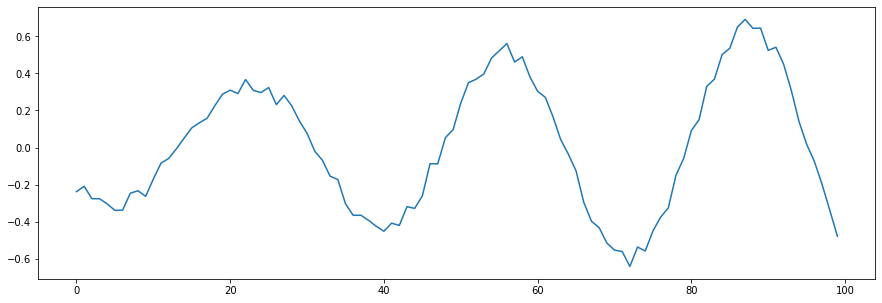

In [3]:
# generate time series
n_steps = 100
series = generate_time_series(1, n_steps)

plt.figure(figsize = (15, 5))
plt.plot(pd.DataFrame(series[0]))
plt.show()

## Generate Seasonal Time Series

In [4]:
# function to generate time series that has trend, seasonality, and noise

'''
This function creates one time series with adjustable trend, repeated seasonal
patterns, random white noise, and a leveling shift.

Arguments:
    > slope           : a proxy for trend
    > pattern_steps   : use generate_time_series() to create a patterns
    > pattern_repeats : number of times to repeat the pattern
    > noise_size      : magnitude of white noise
    > level_size      : a value added to the entire time series

Return:
    > Combine trend, seasonal, noise, and level
'''

def generate_seasonal_time_series(slope, pattern_steps, pattern_repeats,
                                  noise_size, level_size):
    
    # set steps
    freq, offsets = np.random.rand(2, 1)
    n_steps = pattern_steps * pattern_repeats

    # trend
    trend = np.arange(n_steps) * slope

    # seasonality
    pattern = pd.DataFrame(generate_time_series(1, pattern_steps)[0]) * 100
    seasonal = []
    seasonal.extend(itertools.repeat(pattern[0], pattern_repeats))
    seasonal = list(itertools.chain.from_iterable(seasonal))

    # white noise
    noise = np.random.randn(n_steps) * noise_size

    # level
    level = pd.Series(level_size, index = np.arange(n_steps))

    return trend + seasonal + noise + level

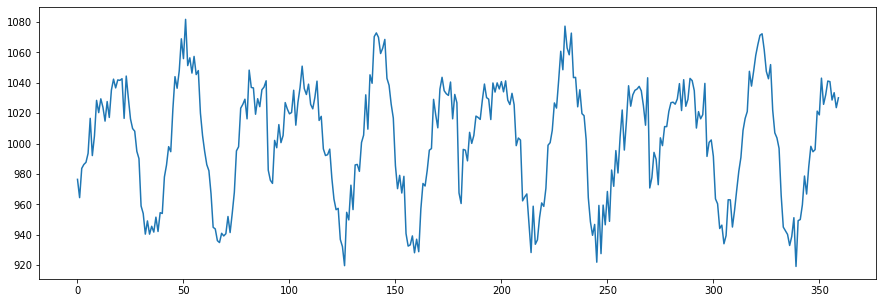

In [9]:
# generate seasonal time series
series = generate_seasonal_time_series(slope = 0, 
                                       pattern_steps = 90,
                                       pattern_repeats = 4,
                                       noise_size = 10,
                                       level_size = 1000
                                       )

plt.figure(figsize = (15, 5))
plt.plot(pd.DataFrame(series))
plt.show()